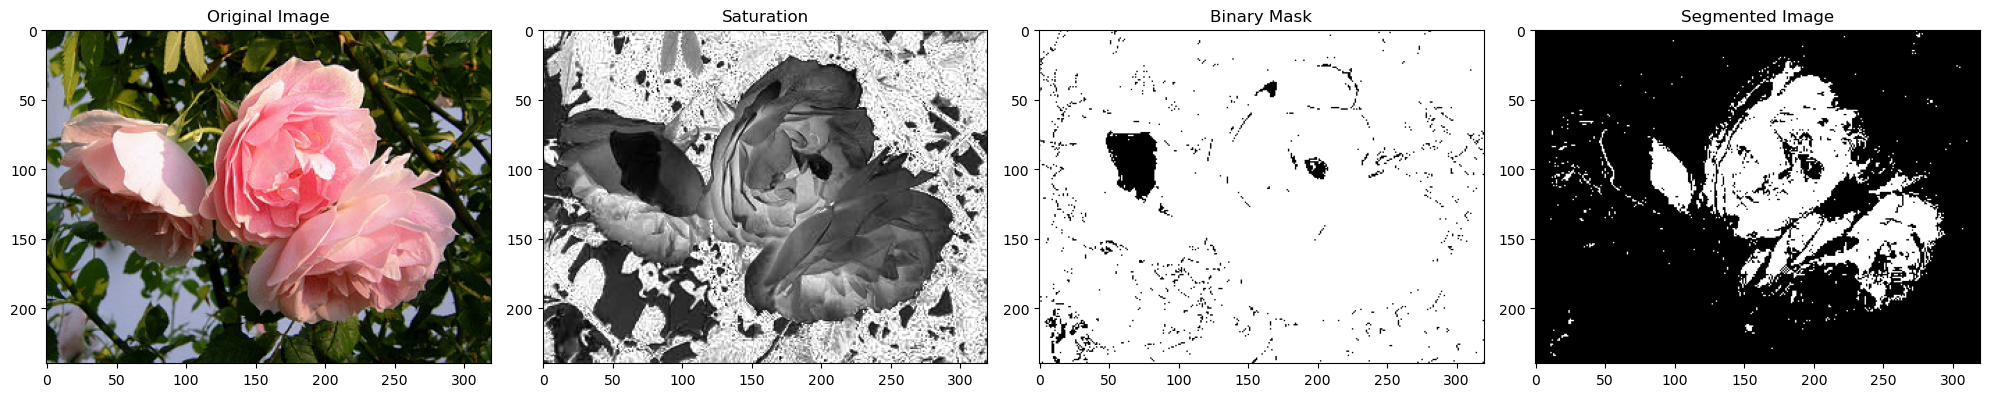

In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Load and convert to HSI using OpenCV
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
image = cv2.imread(image_path)

hsi_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue, saturation, intensity = cv2.split(hsi_image)

# Normalize the HSI components
hue = hue / 179.0  # Hue in OpenCV HSV ranges from 0 to 179
saturation = saturation / 255.0
intensity = intensity / 255.0

# Step 2: Threshold Saturation Image
saturation_threshold = 0.1
binary_mask = (saturation > saturation_threshold).astype(np.float32)

# Step 3: Multiply Mask with Hue
masked_hue = hue * binary_mask

# Step 4: Threshold Product Image
hue_threshold = 0.9
binary_segmented = (masked_hue > hue_threshold).astype(np.float32)

# Display Results
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(saturation, cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(binary_mask, cmap='gray')
ax[2].set_title('Binary Mask')
ax[3].imshow(binary_segmented, cmap='gray')
ax[3].set_title('Segmented Image')
plt.tight_layout()
plt.show()
